# Pizza restaurants and the pizza they sell

Dados com cerca de 3,500 pizzas de diversos restaurantes dos EUA.

Dataset: https://www.kaggle.com/datafiniti/pizza-restaurants-and-the-pizza-they-sell<br>
Mapa EUA: http://www.guiageo-eua.com/imagens/mapa-politico.jpg

## Descrição das variaveis

<b>id - </b>ID do restauranre <br>
<b>address -</b> Endereço<br>
<b>categories - </b>Categorias dos restaurantes<br>
<b>city - </b>Cidade<br>
<b>country -</b> </b>Pais<br>
<b>keys - </b>Palavras chaves<br>
<b>latitude - </b>Latitude<br>
<b>longitude - </b>Longitude<br>
<b>menuPageURL - </b>URL da pagina do restaurante<br>
<b>menus.amountMax - </b>Preço maximo do menu<br>
<b>menus.amountMin - </b> Preço minimo do menu<br>
<b>menus.currency -</b> Moeda aceita<br>
<b>menus.dateSeen -</b> Data que o menu foi visto<br>
<b>menus.description - </b>Descrição do menu, ingredientes<br>
<b>menus.name -</b> Nome da Pizza<br>
<b>name -</b> Nome do restaurante<br>
<b>postalCode - </b>CEP do restaurante<br>
<b>priceRangeCurrency - </b>Tipo de Moeda<br>
<b>priceRangeMin - </b>Faixa de variação minima da pizza<br>
<b>priceRangeMax - </b>Faixa de variação maxima da pizza<br>
<b>province -</b> Estado/Provincia<br>

In [34]:
# Import dos pacotes
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
import plotly.offline as py

In [2]:
pizzas = pd.read_csv('8358_1.csv')

## Exploração

In [3]:
pizzas.head(2)

,id,address,categories,city,country,keys,latitude,longitude,menuPageURL,menus.amountMax,...,menus.currency,menus.dateSeen,menus.description,menus.name,name,postalCode,priceRangeCurrency,priceRangeMin,priceRangeMax,province
0,AVwc_6KEIN2L1WUfrKAH,Cascade Village Mall Across From Target,Pizza Place,Bend,US,us/or/bend/cascadevillagemallacrossfromtarget/...,44.102665,-121.300797,NaN,22.50,...,USD,2016-03-31T02:19:42Z,NaN,Bianca Pizza,Little Pizza Paradise,97701,NaN,NaN,NaN,OR
1,AVwc_6KEIN2L1WUfrKAH,Cascade Village Mall Across From Target,Pizza Place,Bend,US,us/or/bend/cascadevillagemallacrossfromtarget/...,44.102665,-121.300797,NaN,18.95,...,USD,2016-03-31T02:19:42Z,NaN,Cheese Pizza,Little Pizza Paradise,97701,NaN,NaN,NaN,OR


In [4]:
pizzas.shape

(3510, 21)

In [5]:
# Verifica valores nulos
pizzas.isnull().sum()

id                       0
address                  0
categories               0
city                     0
country                  0
keys                     0
latitude                 0
longitude                0
menuPageURL           2900
menus.amountMax        562
menus.amountMin        562
menus.currency         559
menus.dateSeen           0
menus.description     1984
menus.name               0
name                     0
postalCode              26
priceRangeCurrency    1953
priceRangeMin         1953
priceRangeMax         1953
province                 0
dtype: int64

In [6]:
# remove variaveis desnecessarias para analise
inuteis = ['menuPageURL', 'id']
pizzas = pizzas.drop(inuteis, axis=1)  

# Incrementa os valores nulos
pizzas['menus.currency'].fillna('USD',inplace=True)
pizzas['priceRangeCurrency'].fillna('USD',inplace=True)

# Incrementa os valores com a média
pizzas['priceRangeMin'].fillna(round(pizzas['priceRangeMin'].mean(), 2),inplace=True)
pizzas['priceRangeMax'].fillna(round(pizzas['priceRangeMax'].mean(), 2),inplace=True)

## Visualizações e Gráficos Estatisticos

### Sabores

Vamos analisar os sabores das pizzas e regionalmente onde se encontram

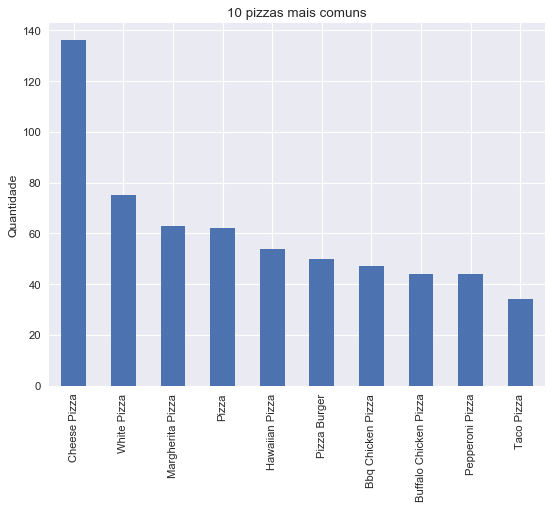

In [7]:
# Sabores de pizza
sabores = pizzas['menus.name'].value_counts() 

plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
sabores[:10].plot.bar()
plt.title('10 pizzas mais comuns')
plt.ylabel('Quantidade')      
plt.show();

Pizza de queijo é a campeã nos EUA. 

Se dermos uma olhada nos ultimos valores da lista vamos encontrar as pizzas mais "exóticas"

In [8]:
print(sabores.head(30))

Cheese Pizza             136
White Pizza               75
Margherita Pizza          63
Pizza                     62
Hawaiian Pizza            54
Pizza Burger              50
Bbq Chicken Pizza         47
Buffalo Chicken Pizza     44
Pepperoni Pizza           44
Taco Pizza                34
Veggie Pizza              34
Pizza Sub                 33
Pizza Steak               31
Pizza Fries               31
Pizza By The Slice        30
Greek Pizza               30
Mexican Pizza             29
Pizza Margherita          28
Pizza Bread               26
Sicilian Pizza            24
Vegetarian Pizza          21
Create Your Own Pizza     20
Build Your Own Pizza      18
Breakfast Pizza           17
Margarita Pizza           16
Pizza Bagel               15
Meat Lovers Pizza         14
Specialty Pizza           13
Pizza Roll                12
Pizza Bianca              12
Name: menus.name, dtype: int64


Me chamou atenção 4 tipos de pizzas:
 - Pizza Burger
 - Pizza Bread
 - Breakfast Pizza
 - Pizza Steak

Vamos verificar no mapa onde são comercializas a Pizzas Burger

In [48]:
# Pizza Burger
pb_df = pizzas[pizzas['menus.name']=='Pizza Burger'] #Dataframe apenas para Pizza Burger

# Parametros do mapa
data = [ dict(
        type = 'scattergeo',
        locationmode = 'USA-states',
        lon = pb_df['longitude'],
        lat = pb_df['latitude'],
        text = pb_df['city'],
        mode = 'markers',
        marker = dict( 
            size = 8, 
            opacity = 0.6,
            reversescale = True,
            autocolorscale = False,
            symbol = 'circle',
            line = dict(
                width=1,
                color='rgba(102, 102, 102)'
            )))]

# Layout
layout = dict(
        title = 'Localizações das pizzas sabor Pizza Burger',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa'),
            showland = True,
            landcolor = "rgb(250, 250, 250)",
            subunitcolor = "rgb(217, 217, 217)",
            countrycolor = "rgb(217, 217, 217)",
            countrywidth = 0.5,
            subunitwidth = 0.5))

py.init_notebook_mode(connected=True)
fig = dict( data=data, layout=layout )
py.iplot(fig, filename='pizzasBurger.html')

A Pizza Burger possui uma predominancia maior na região da Nova Jersey, Pensilvania e Nova York, com alguns pontos em Illinois, Florida e California.

Essa tal de White pizza...nunca ouvi falar

Ela possui 75 pontos mas me parece ser um pouco popular, vamos ver geograficamente:

In [10]:
# White Pizza
wp_df = pizzas[pizzas['menus.name']=='White Pizza'] #Dataframe apenas para White Pizza

# Parametros do mapa
data = [ dict(
        type = 'scattergeo',
        locationmode = 'USA-states',
        lon = wp_df['longitude'],
        lat = wp_df['latitude'],
        text = wp_df['city'],
        mode = 'markers',
        marker = dict( 
            size = 8, 
            opacity = 0.6,
            reversescale = True,
            autocolorscale = False,
            symbol = 'circle',
            line = dict(
                width=1,
                color='rgba(102, 102, 102)'
            )))]

# Layout
layout = dict(
        title = 'Localizações das pizzas sabor White Pizza',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa'),
            showland = True,
            landcolor = "rgb(250, 250, 250)",
            subunitcolor = "rgb(217, 217, 217)",
            countrycolor = "rgb(217, 217, 217)",
            countrywidth = 0.5,
            subunitwidth = 0.5))

py.init_notebook_mode(connected=True)
fig = dict( data=data, layout=layout )
py.iplot(fig, filename='whitePizza.html')

Ela parece ser bem mais distriuida geograficamente do que a Pizza Burguer.

Se pegarmos os ingredientes dessa pizza parece ser bem parecida com a nossa classica 4 ou 3 queijos

In [11]:
wp_df['menus.description'].value_counts()

Ricotta, Mozzarella and Garlic                                                                                                                                                            2
Traditional plain                                                                                                                                                                         1
Ricotta and mozzarella cheese with a hint of olive oil.                                                                                                                                   1
Alfredo sauce, smoked provolone, artichoke hearts, mushrooms, spinach                                                                                                                     1
Bacon, Onions, Jumpin Good Goat Farms Feta, Thyme, Pepperoncini                                                                                                                           1
With broccoli or tomatoes                                   

Vamos analisar as pizzas vegetarianas :)))

Se voltarmos lá para a lista de sabores podemos ver que existem 151 sabores de pizzas vegetarias/veganas no dataset, basicamente nomes diferentes com os mesmos ingredientes.

In [49]:
# Verificando a quantidade de pizzas vegetarias/veganas
print("Quantidade: ", len(pizzas[pizzas["menus.name"].str.lower().str.contains("veg")]))

Quantidade:  151


Vamos analisar as Vegetarian Pizzas e as Veggie Pizzas

In [13]:
# Quantidade de pizzas Vegetarias e Veganas
print("Vegetarian Pizzas", len(pizzas[pizzas["menus.name"].str.lower().str.contains("vegetarian")])) 
print("Veggie Pizzas", len(pizzas[pizzas["menus.name"].str.lower().str.contains("veggie")])) 
print("Vegetable Pizzas", len(pizzas[pizzas["menus.name"].str.lower().str.contains("vegetable")])) 

Vegetarian Pizzas 32
Veggie Pizzas 77
Vegetable Pizzas 30


Existe mais opções de pizzas veganas que vegetarias nos EUA :o

Talvez porque com as Pizzas Veganas você atinge 2 publicos de uma unica vez.

Existe tambem a opção Gluten Free:

In [14]:
# Pizzas Gluten Free
pizzas[pizzas["menus.name"].str.lower().str.contains("gluten free")]["menus.name"]

307     Gluten Free Cheese Tomato Thin Crust Pizza
308         Gluten Free Pepperoni Thin Crust Pizza
309            Gluten Free Veggie Thin Crust Pizza
370                              Gluten Free Pizza
422                      Gluten Free Veg Out Pizza
709                              Gluten Free Pizza
1299                             Gluten Free Pizza
1707                     Gluten Free Veg Out Pizza
1975                             Gluten Free Pizza
2034                   Gluten Free Pizza Available
2224                    Gluten Free Pizza Calandra
2247                             Gluten Free Pizza
2532                     Gluten Free Veg Out Pizza
2722                             Gluten Free Pizza
2730                     Gluten Free Veg Out Pizza
3152                     Gluten Free Veg Out Pizza
3417                     Gluten Free Veg Out Pizza
Name: menus.name, dtype: object

Vamos para as analises:

In [15]:
# Vegetarian Pizza
vege_df = pizzas[pizzas['menus.name']=='Vegetarian Pizza'] #Dataframe apenas para Vegetarian Pizza

# Parametros do mapa
data = [ dict(
        type = 'scattergeo',
        locationmode = 'USA-states',
        lon = vege_df['longitude'],
        lat = vege_df['latitude'],
        text = vege_df['city'],
        mode = 'markers',
        marker = dict( 
            size = 8, 
            opacity = 0.6,
            reversescale = True,
            autocolorscale = False,
            symbol = 'circle',
            line = dict(
                width=1,
                color='rgba(102, 102, 102)'
            )))]

# Layout
layout = dict(
        title = 'Localizações das pizzas sabor Vegetarian',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa'),
            showland = True,
            landcolor = "rgb(250, 250, 250)",
            subunitcolor = "rgb(217, 217, 217)",
            countrycolor = "rgb(217, 217, 217)",
            countrywidth = 0.5,
            subunitwidth = 0.5))

py.init_notebook_mode(connected=True)
fig = dict( data=data, layout=layout )
py.iplot(fig, filename='vegetarianPizza.html')

Parece que a região central dos EUA não gosta muito de pizza Vegetariana haha
Existem algumas opções na costa leste do pais, como por exemplo New York, Massachusetts e Florida e algumas outras na costa oeste, como California e Washington.

In [16]:
# Veggie Pizza
vegg_df = pizzas[pizzas['menus.name']=='Veggie Pizza'] #Dataframe apenas para Veggie Pizza

# Parametros do mapa
data = [ dict(
        type = 'scattergeo',
        locationmode = 'USA-states',
        lon = vegg_df['longitude'],
        lat = vegg_df['latitude'],
        text = vegg_df['city'],
        mode = 'markers',
        marker = dict( 
            size = 8, 
            opacity = 0.6,
            reversescale = True,
            autocolorscale = False,
            symbol = 'circle',
            line = dict(
                width=1,
                color='rgba(102, 102, 102)'
            )))]

# Layout
layout = dict(
        title = 'Localizações das pizzas sabor Veggie',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa'),
            showland = True,
            landcolor = "rgb(250, 250, 250)",
            subunitcolor = "rgb(217, 217, 217)",
            countrycolor = "rgb(217, 217, 217)",
            countrywidth = 0.5,
            subunitwidth = 0.5))

py.init_notebook_mode(connected=True)
fig = dict( data=data, layout=layout )
py.iplot(fig, filename='vegetarianPizza.html')

Já a pizza Vegana é bem mais distribuida quando comparado a vegetariana.

Existem diversas opções na costa leste, algumas poucas no centro e sul, como Colorado, Taxas e Louisiana.

### Cidades

Vamos agora analisar as cidade

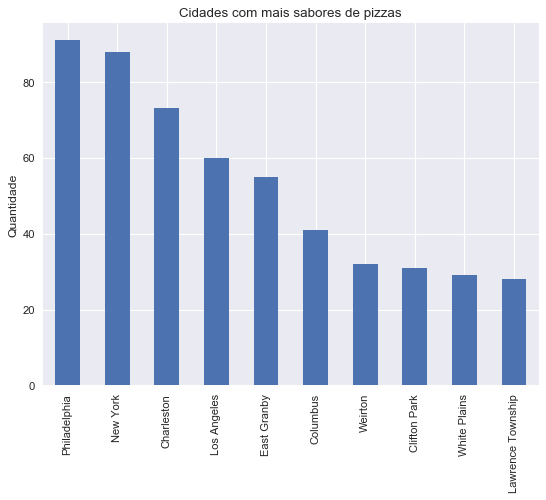

In [17]:
# Cidades com mais pizzas
pizzas_city = pizzas['city'].value_counts()

plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
pizzas_city[:10].plot.bar()
plt.title('Cidades com mais sabores de pizzas')
plt.ylabel('Quantidade')      
plt.show();

Parece que Philadelphia é a cidade com mais sabores de pizzas, vamos ver quais elas são:

In [18]:
qtd_pizzasPhi = len(pd.Series.unique(pizzas[pizzas["city"].str.lower().str.contains("philadelphia")]["menus.name"]))

print('Philadelphia contem {} opções de pizzas!'.format(qtd_pizzasPhi))

Philadelphia contem 61 opções de pizzas!


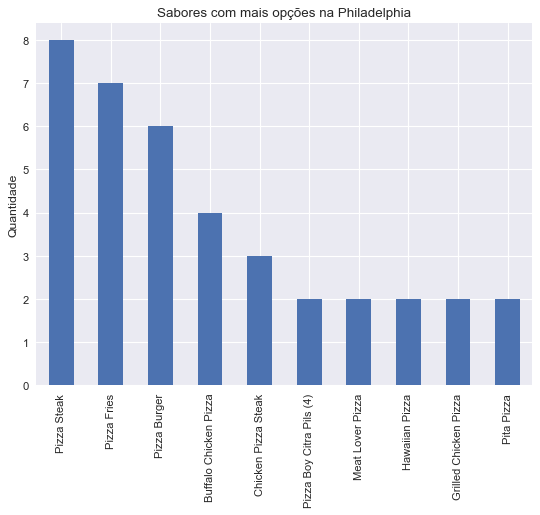

In [19]:
# Pizzas mais oferecidas na Philadelphia
pizzasPhi = pizzas[pizzas["city"].str.lower().str.contains("philadelphia")]["menus.name"].value_counts()

plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
pizzasPhi[:10].plot.bar()
plt.title('Sabores com mais opções na Philadelphia')
plt.ylabel('Quantidade')      
plt.show();

O povo da Philadelphia gosta muito de pizza de carne haha

Vamos analisar por Estado/Província

### Estados/Províncias

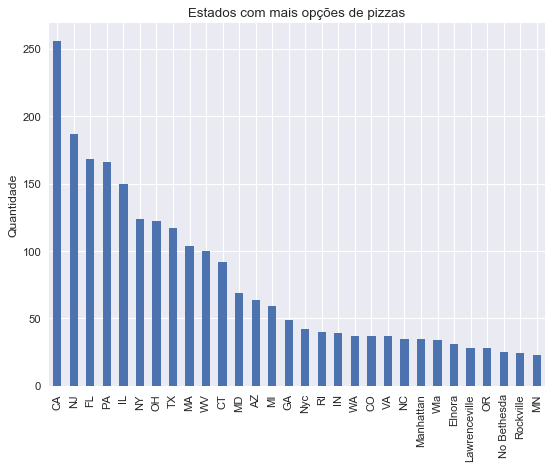

In [20]:
# Estados com mais opções de pizzas
pizzas_prov = pizzas['province'].value_counts()

plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
pizzas_prov[:30].plot.bar()
plt.title('Estados com mais opções de pizzas')
plt.ylabel('Quantidade')      
plt.show();

Hm tem algo estranho ali...

Tem alguns nomes de cidades onde deveriam ter nomes de estados...

vamos fazer algumas melhorias

In [21]:
# Verificando os estados não-sigla
pizzas[pizzas['province'].str.len() > 2]['province']

2                   Brentwood
3                   Brentwood
4                   Brentwood
5                   Brentwood
6                   Brentwood
7                   Los Feliz
8                   Los Feliz
9                   Los Feliz
10                  Los Feliz
11                  Los Feliz
12                  Los Feliz
21             Ontario Street
22             Ontario Street
23             Ontario Street
24             Ontario Street
62                Weirs Beach
81              Lawrenceville
82              Lawrenceville
83              Lawrenceville
84              Lawrenceville
85              Lawrenceville
86              Lawrenceville
87              Lawrenceville
88              Lawrenceville
89              Lawrenceville
90              Lawrenceville
91              Lawrenceville
92              Lawrenceville
93              Lawrenceville
94              Lawrenceville
                ...          
3446               Fair Haven
3447               Fair Haven
3448      

In [40]:
# Função para alterar os nomes dos Estados
def altera_estado():
    for c in pizzas['province']:
        if c == 'Brentwood':
            pizzas['province'].replace('Brentwood', 'CA', inplace=True)
        if c == 'Los Feliz':
            pizzas['province'].replace('Los Feliz', 'LA', inplace=True)
        if c == 'Ontario Street':
            pizzas['province'].replace('Ontario Street', 'OR', inplace=True)
        if c == 'Manhattan':
            pizzas['province'].replace('Manhattan', 'NY', inplace=True)
        if c == 'Honey Creek':
            pizzas['province'].replace('Honey Creek', 'IN', inplace=True)
        if c == 'Davidsburg':
            pizzas['province'].replace('Davidsburg', 'PA', inplace=True)
        if c == 'Lawrenceville':
            pizzas['province'].replace('Lawrenceville', 'NJ', inplace=True)
        if c == 'Weirs Beach':
            pizzas['province'].replace('Weirs Beach', 'NH', inplace=True)
        if c == 'Dania Beach':
            pizzas['province'].replace('Dania Beach', 'FL', inplace=True)
        if c == 'Fair Haven':
            pizzas['province'].replace('Fair Haven', 'NJ', inplace=True)
        if c == 'Seabrook Island':
            pizzas['province'].replace('Seabrook Island', 'SC', inplace=True)
        if c == 'Valleyview':
            pizzas['province'].replace('Valleyview', 'OH', inplace=True)
        if c == 'Pembroke Pnes':
            pizzas['province'].replace('Pembroke Pnes', 'FL', inplace=True)
        if c == 'Wilm':
            pizzas['province'].replace('Wilm', 'NC', inplace=True)
        if c == 'Hassan':
            pizzas['province'].replace('Hassan', 'MN', inplace=True)
        if c == 'Crestview Heights':
            pizzas['province'].replace('Crestview Heights', 'OR', inplace=True)
        if c == 'Grove':
            pizzas['province'].replace('Grove', 'NJ', inplace=True)
        if c == 'Village Of Wellington':
            pizzas['province'].replace('Village Of Wellington', 'FL', inplace=True)
        if c == 'Oldtown':
            pizzas['province'].replace('Oldtown', 'ID', inplace=True)
        if c == 'Elmhurst':
            pizzas['province'].replace('Elmhurst', 'IL', inplace=True)
        if c == 'Bloomfld Hls':
            pizzas['province'].replace('Bloomfld Hls', 'MI', inplace=True)
        if c == 'Joppatowne':
            pizzas['province'].replace('Joppatowne', 'MD', inplace=True)
        if c == 'Baxter Estates':
            pizzas['province'].replace('Baxter Estates', 'NY', inplace=True)
        if c == 'Co Spgs':
            pizzas['province'].replace('Co Spgs', 'CO', inplace=True)
        if c == 'Queens':
            pizzas['province'].replace('Queens', 'NY', inplace=True)
        if c == 'Midtown':
            pizzas['province'].replace('Midtown', 'NY', inplace=True)
        if c == 'Townley':
            pizzas['province'].replace('Townley', 'AL', inplace=True)
        if c == 'Rivervale':
            pizzas['province'].replace('Rivervale', 'NJ', inplace=True)
        if c == 'Rivervale':
            pizzas['province'].replace('Rivervale', 'NJ', inplace=True)
        if c == 'Pitt':
            pizzas['province'].replace('Pitt', 'PA', inplace=True)
        if c == 'Nyc':
            pizzas['province'].replace('Nyc', 'NY', inplace=True)
        if c == 'Weymouth Nas':
            pizzas['province'].replace('Weymouth Nas', 'MA', inplace=True)
        if c == 'East Htfd':
            pizzas['province'].replace('East Htfd', 'CT', inplace=True)
        if c == 'Rockville':
            pizzas['province'].replace('Rockville', 'MD', inplace=True)
        if c == 'No Bethesda':
            pizzas['province'].replace('No Bethesda', 'MD', inplace=True)
        if c == 'Elnora':
            pizzas['province'].replace('Elnora', 'IN', inplace=True)
        if c == 'Arco-plaza':
            pizzas['province'].replace('Arco-plaza', 'LA', inplace=True)
        if c == 'Brownhelm':
            pizzas['province'].replace('Brownhelm', 'OH', inplace=True)
        if c == 'Bellefonte':
            pizzas['province'].replace('Bellefonte', 'PA', inplace=True)
        if c == 'Bloomington Heights':
            pizzas['province'].replace('Bloomington Heights', 'IL', inplace=True)
        if c == 'West Deerfield':
            pizzas['province'].replace('West Deerfield', 'FL', inplace=True)
        if c == 'West Medford':
            pizzas['province'].replace('West Medford', 'MA', inplace=True)
        if c == 'West Mifflin':
            pizzas['province'].replace('West Mifflin', 'PA', inplace=True)
        if c == 'West Pittsburg':
            pizzas['province'].replace('West Pittsburg', 'PA', inplace=True)
        if c == 'West Vail':
            pizzas['province'].replace('West Vail', 'CO', inplace=True)
        if c == 'Wheatfield':
            pizzas['province'].replace('Wheatfield', 'NY', inplace=True)
        if c == 'Williams Crk':
            pizzas['province'].replace('Williams Crk', 'IN', inplace=True)
        if c == 'Willoughby Hills':
            pizzas['province'].replace('Willoughby Hills', 'OH', inplace=True)
        if c == 'Woodbury':
            pizzas['province'].replace('Woodbury', 'MN', inplace=True)
        if c == 'Burlngtn City':
            pizzas['province'].replace('Burlngtn City', 'VT', inplace=True)
        if c == 'Bunker Hill Village':
            pizzas['province'].replace('Bunker Hill Village', 'TX', inplace=True)
        if c == 'Brownstown Twp':
            pizzas['province'].replace('Brownstown Twp', 'MI', inplace=True)
        if c == 'Brownsboro Farm':
            pizzas['province'].replace('Brownsboro Farm', 'KY', inplace=True)
        if c == 'Briarcliff Mnr':
            pizzas['province'].replace('Briarcliff Mnr', 'NY', inplace=True)
        if c == 'Brandtsville':
            pizzas['province'].replace('Brandtsville', 'PA', inplace=True)
        if c == 'Bouquet Canyon':
            pizzas['province'].replace('Bouquet Canyon', 'CA', inplace=True)
        if c == 'Bonney Lk':
            pizzas['province'].replace('Bonney Lk', 'WA', inplace=True)
        if c == 'Blue Anchor':
            pizzas['province'].replace('Blue Anchor', 'NJ', inplace=True)
        if c == 'Bloomington Hills':
            pizzas['province'].replace('Bloomington Hills', 'UT', inplace=True)
        if c == 'Clarkson Valley':
            pizzas['province'].replace('Clarkson Valley', 'MO', inplace=True)
        if c == 'Colorado Spgs':
            pizzas['province'].replace('Colorado Spgs', 'CO', inplace=True)
        if c == 'Country Life Acres':
            pizzas['province'].replace('Country Life Acres', 'MO', inplace=True)
        if c == 'N Egremont':
            pizzas['province'].replace('N Egremont', 'MA', inplace=True)
        if c == 'North Glenn':
            pizzas['province'].replace('North Glenn', 'CO', inplace=True)
        if c == 'Friendsville':
            pizzas['province'].replace('Friendsville', 'IL', inplace=True)
        if c == 'Groesbeck':
            pizzas['province'].replace('Groesbeck', 'OH', inplace=True)
        if c == 'City Of Spokane Valley':
            pizzas['province'].replace('City Of Spokane Valley', 'WA', inplace=True)
        if c == 'Oella':
            pizzas['province'].replace('Oella', 'MD', inplace=True)
        if c == 'No Providence':
            pizzas['province'].replace('No Providence', 'Providence', inplace=True)   
        if c == 'Murdock':
            pizzas['province'].replace('Murdock', 'MN', inplace=True)   
        if c == 'Quincy Center':
            pizzas['province'].replace('Quincy Center', 'MA', inplace=True)   
        if c == 'Marble Cliff':
            pizzas['province'].replace('Marble Cliff', 'OH', inplace=True)   
        if c == 'New York City':
            pizzas['province'].replace('New York City', 'NY', inplace=True)   
        if c == 'S Connelsvl':
            pizzas['province'].replace('S Connelsvl', 'PA', inplace=True)   
        if c == 'Juanita':
            pizzas['province'].replace('Juanita', 'WA', inplace=True)   
        if c == 'Forest View':
            pizzas['province'].replace('Forest View', 'IL', inplace=True)   
        if c == 'Kingsgate':
            pizzas['province'].replace('Kingsgate', 'WA', inplace=True)   
        if c == 'Mount Laurel Township':
            pizzas['province'].replace('Mount Laurel Township', 'NJ', inplace=True)   
        if c == 'St Albans':
            pizzas['province'].replace('St Albans', 'VT', inplace=True)   
        if c == 'Queensgate':
            pizzas['province'].replace('Queensgate', 'OH', inplace=True)   
        if c == 'Raugust':
            pizzas['province'].replace('Raugust', 'WA', inplace=True)   
        if c == 'Fairmont':
            pizzas['province'].replace('Fairmont', 'WV', inplace=True)   
        if c == 'Providence':
            pizzas['province'].replace('Providence', 'RI', inplace=True)   
        if c == 'Matthewstown':
            pizzas['province'].replace('Matthewstown', 'NC', inplace=True)   
        if c == 'Deephaven':
            pizzas['province'].replace('Deephaven', 'MN', inplace=True)   
        if c == 'Macomb Twp':
            pizzas['province'].replace('Macomb Twp', 'IL', inplace=True)   
        if c == 'Murfreesbr':
            pizzas['province'].replace('Murfreesbr', 'TN', inplace=True)   
        if c == 'Fort Dearborn':
            pizzas['province'].replace('Fort Dearborn', 'IL', inplace=True)   
        if c == 'Saint Davids':
            pizzas['province'].replace('Saint Davids', 'PA', inplace=True)   
        if c == 'Wesley Chapel':
            pizzas['province'].replace('Wesley Chapel', 'FL', inplace=True)   
        if c == 'West Glenville':
            pizzas['province'].replace('West Glenville', 'NY', inplace=True)   
        if c == 'Margate':
            pizzas['province'].replace('Margate', 'FL', inplace=True)   
        if c == 'Miami':
            pizzas['province'].replace('Miami', 'FL', inplace=True)   
        if c == 'Hollywood Park':
            pizzas['province'].replace('Hollywood Park', 'TX', inplace=True)   
        if c == 'East Haven':
            pizzas['province'].replace('East Haven', 'CT', inplace=True)   
        if c == 'Carpolis':
            pizzas['province'].replace('Carpolis', 'LA', inplace=True)   
        if c == 'Cherry Hill Township':
            pizzas['province'].replace('Cherry Hill Township', 'NJ', inplace=True)           
        if c == 'Guilford Courthouse National':
            pizzas['province'].replace('Guilford Courthouse National', 'NC', inplace=True)           

In [41]:
altera_estado()

Vamos ver se com essas pequena melhoria nos dados altera o nosso gráfico

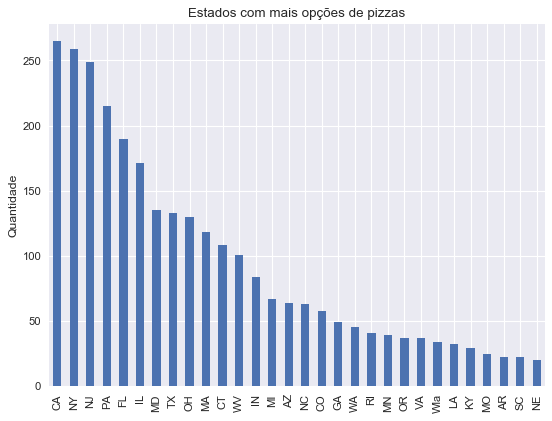

In [42]:
pizzas_prov = pizzas['province'].value_counts()

plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
pizzas_prov[:30].plot.bar()
plt.title('Estados com mais opções de pizzas')
plt.ylabel('Quantidade')      
plt.show();

Tivemos algumas alteração interessantes no grafico.

NY, que antes ocupada a 6° posição, subiu para 2°, já NJ caiu da 2° para 3°.

### Preços

Vamos analisar os preços por Estado

Antes, vamos dar uma olhada nos dados:

In [25]:
# Analize inicial de valores 0 ou NA

print("Qtd zeros no 'priceRangeMin': ", len(pizzas[pizzas['priceRangeMin'] == 0]['priceRangeMin']))
print("Qtd NA no 'priceRangeMin': ", pizzas['priceRangeMin'].isnull().sum()) # Já haviamos feito o incremento previo com a média

print("Qtd zeros no 'priceRangeMax': ", len(pizzas[pizzas['priceRangeMax'] == 0]['priceRangeMin']))
print("Qtd NA no 'priceRangeMax': ", pizzas['priceRangeMax'].isnull().sum()) # Já haviamos feito o incremento previo com a média

Qtd zeros no 'priceRangeMin':  730
Qtd NA no 'priceRangeMin':  0
Qtd zeros no 'priceRangeMax':  0
Qtd NA no 'priceRangeMax':  0


Vamos corrigir com a média os valores com 0 de priceRangeMin

Aqui tem um ponto importnate: É possivel que o valor minimo seja sim 0 Dolares...porem acho que não seja verdade, por isso tomei a decisão de incrementar os valores 0 com a média.

Caberia aqui uma analise mais profunda dos dados e até da região especifica de cada um desses valores zerados.

In [44]:
# Incrementa os valores 0 de priceRangeMin com a média
pizzas['priceRangeMin'].replace(pizzas[pizzas['priceRangeMin'] == 0]['priceRangeMin'], round(pizzas['priceRangeMin'].mean(), 2), inplace=True)

In [45]:
print("Qtd zeros no 'priceRangeMin': ", len(pizzas[pizzas['priceRangeMin'] == 0]['priceRangeMin']))

Qtd zeros no 'priceRangeMin':  0


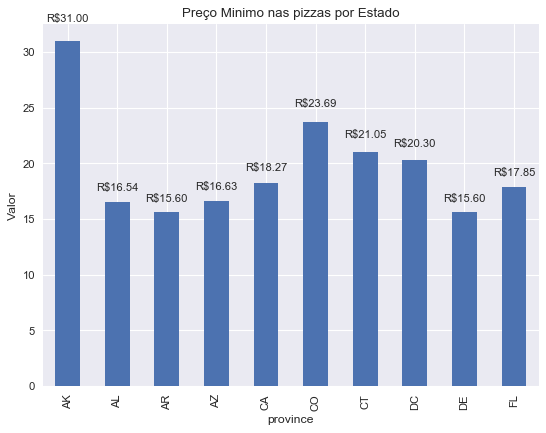

In [43]:
# Provincia por Preço Minimo

pizzas_provPrice = pizzas[pizzas['province'].str.len() == 2].groupby(['province'])['priceRangeMin'].mean()

plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
ax = pizzas_provPrice[:10].plot.bar()
ax.set_title("Preço Minimo nas pizzas por Estado")
ax.set_ylabel("Valor")

rects = ax.patches

for rect in rects:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
            #'%d' % int(height),
            'R${:1.2f}'.format(height),
            ha='center', va='bottom')

plt.show();

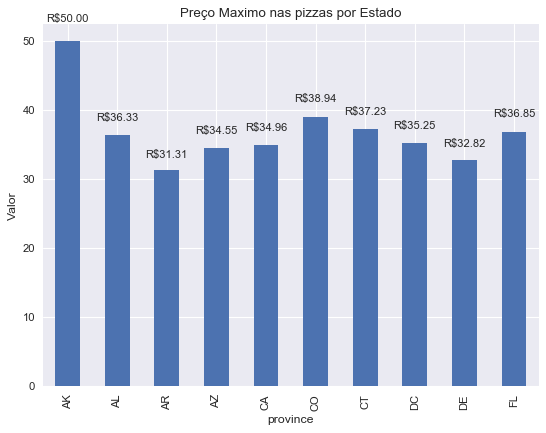

In [46]:
# Provincia por Preço Maximo

pizzas_provPrice = pizzas[pizzas['province'].str.len() == 2].groupby(['province'])['priceRangeMax'].mean()

plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
ax = pizzas_provPrice[:10].plot.bar()
ax.set_title("Preço Maximo nas pizzas por Estado")
ax.set_ylabel("Valor")

rects = ax.patches

for rect in rects:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
            #'%d' % int(height),
            'R${:1.2f}'.format(height),
            ha='center', va='bottom')

plt.show();

Vale lembrar aqui: Os dados talvez não sejam condicentes com as informações reais, por exemplo, AK (Alasca) possui o maior preço minimo e maximo de Pizza dos Estados Unidos, porem ele possui somente 1 unico registro em todo o dataset.

Pode vir a ser um outlier, porem acredito que devido ao fato de não ter sido feita a alteração cidade-estado em todos os dados do dataset, muita informação referente a preço esta "solta".

Sem contar que como o Alasca é um estado longe...o preço lá pode sim vir a ser mais alto que o normal.

# Fim